# RNNs
Task:
1. Download and explore data
2. Preproceess data if needed
3. Create a dataset with group of inputs of size X = (10-50) - Randomly sample points, and take the next X points
3.a. Either randomly sample different points to get xs and ys
3.b Or Take evert possible datapoint from 0 to size of dataset - x. and shuffle the dataset
4. Make it into a tensorflow dataset, Split the data into train and test
5. Time distributed predictions with size 5-10
6. Use 3 different model architectures (RNN type / wavenet)
7. Prints the different graphs

In [ ]:
#!wget https://storage.googleapis.com/nicksdemobucket/sunspots.csv

# OR

!wget https://storage.googleapis.com/nicksdemobucket/temperatures.csv

# OR MNIST

--2022-04-18 04:00:13--  https://storage.googleapis.com/nicksdemobucket/temperatures.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.99.128, 142.250.107.128, 74.125.199.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.99.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 67921 (66K) [text/csv]
Saving to: ‘temperatures.csv’

temperatures.csv    100%[===================>]  66.33K  --.-KB/s    in 0.001s  

2022-04-18 04:00:13 (91.5 MB/s) - ‘temperatures.csv’ saved [67921/67921]



# Importing Dataset

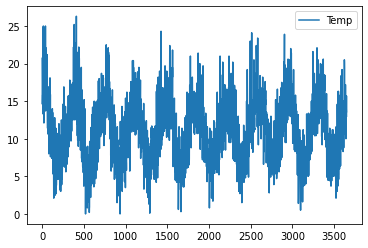

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('temperatures.csv')

df.plot()

In [ ]:
df

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8
...,...,...
3645,1990-12-27,14.0
3646,1990-12-28,13.6
3647,1990-12-29,13.5
3648,1990-12-30,15.7


In [ ]:
type(df.Date[0])

str

In [ ]:
from pandas.tseries.offsets import MonthEnd

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')
df.head()

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


In [ ]:
df.index

DatetimeIndex(['1981-01-01', '1981-01-02', '1981-01-03', '1981-01-04',
               '1981-01-05', '1981-01-06', '1981-01-07', '1981-01-08',
               '1981-01-09', '1981-01-10',
               ...
               '1990-12-22', '1990-12-23', '1990-12-24', '1990-12-25',
               '1990-12-26', '1990-12-27', '1990-12-28', '1990-12-29',
               '1990-12-30', '1990-12-31'],
              dtype='datetime64[ns]', name='Date', length=3650, freq=None)

In [ ]:
df.shape

(3650, 2)

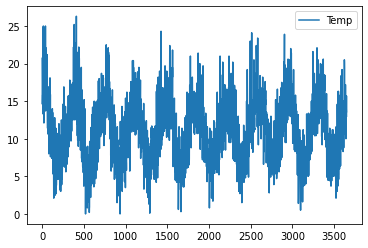

In [ ]:
df.plot()

In [ ]:
split_date = pd.Timestamp('1985-01-01')

In [ ]:
split_date

Timestamp('1985-01-01 00:00:00')

In [ ]:
train = df.loc[:split_date, ['Temp']]
test = df.loc[split_date:, ['Temp']]

In [ ]:
print(train.shape)

(1461, 1)


In [ ]:
print(test.shape)

(2190, 1)


# Preprocessing

In [ ]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()

train_sc = sc.fit_transform(train)
test_sc = sc.fit_transform(test)

In [ ]:
train_sc[:10]

array([[0.78707224],
       [0.68060837],
       [0.7148289 ],
       [0.55513308],
       [0.60076046],
       [0.60076046],
       [0.60076046],
       [0.66159696],
       [0.82889734],
       [0.76045627]])

In [ ]:
train_sc.shape

(1461, 1)

In [ ]:
test_sc.shape

(2190, 1)

In [ ]:
X_train = train_sc[:-1]
y_train = train_sc[1:]

X_test = test_sc[:-1]
y_test = test_sc[1:]

In [ ]:
X_train.shape, y_train.shape

((1460, 1), (1460, 1))

In [ ]:
X_test.shape, y_test.shape

((2189, 1), (2189, 1))

In [ ]:
X_train[:5]

array([[0.78707224],
       [0.68060837],
       [0.7148289 ],
       [0.55513308],
       [0.60076046]])

In [ ]:
y_train[:5]

array([[0.68060837],
       [0.7148289 ],
       [0.55513308],
       [0.60076046],
       [0.60076046]])

# Convert to Tensorflow Dataset

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
ds = tf.data.Dataset.from_tensor_slices(dict(df))

In [ ]:
ds

<TensorSliceDataset element_spec={'Temp': TensorSpec(shape=(), dtype=tf.float64, name=None)}>

# Training Simple RNN

In [ ]:
model = keras.models.Sequential([
                                 keras.layers.SimpleRNN(1, input_shape = [None, 1])
])

optimizer = keras.optimizers.Adam(learning_rate = 0.005)
model.compile(loss = 'mse', optimizer = optimizer)
history = model.fit(X_train, y_train, epochs = 15, verbose = 1)

Epoch 1/15
46/46 [==============================] - 1s 2ms/step - loss: 0.0108
Epoch 2/15
46/46 [==============================] - 0s 2ms/step - loss: 0.0106
Epoch 3/15
46/46 [==============================] - 0s 2ms/step - loss: 0.0106
Epoch 4/15
46/46 [==============================] - 0s 1ms/step - loss: 0.0106
Epoch 5/15
46/46 [==============================] - 0s 2ms/step - loss: 0.0106
Epoch 6/15
46/46 [==============================] - 0s 2ms/step - loss: 0.0106
Epoch 7/15
46/46 [==============================] - 0s 2ms/step - loss: 0.0105
Epoch 8/15
46/46 [==============================] - 0s 2ms/step - loss: 0.0106
Epoch 9/15
46/46 [==============================] - 0s 2ms/step - loss: 0.0106
Epoch 10/15
46/46 [==============================] - 0s 2ms/step - loss: 0.0105
Epoch 11/15
46/46 [==============================] - 0s 2ms/step - loss: 0.0106
Epoch 12/15
46/46 [==============================] - 0s 2ms/step - loss: 0.0106
Epoch 13/15
46/46 [==============================

In [ ]:
model.evaluate(X_test, y_test)

69/69 [==============================] - 0s 1ms/step - loss: 0.0113


0.011284597218036652

In [ ]:
model.evaluate(X_train, y_train)

46/46 [==============================] - 0s 1ms/step - loss: 0.0106


0.010556901805102825

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


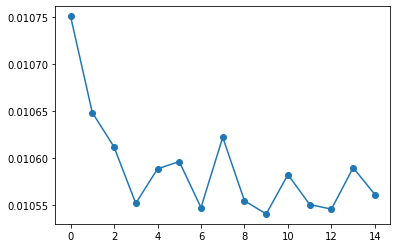

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], 'o-')

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
def plot_series(x, y, color='r'):
  plt.plot(x.reshape(-1), 'o-')
  plt.scatter(51, y, c=color)
  plt.grid(True)

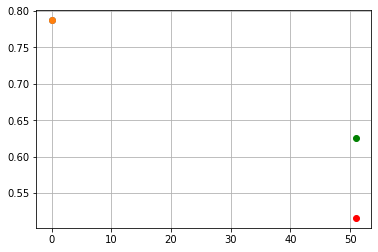

In [ ]:
y_pred = model.predict(X_test)
plot_series(X_train[0], y_test[0], color='g')
plot_series(X_train[0], y_pred[0], color='r')
plt.show()

# Deep RNN

In [ ]:
model_rec_deep = keras.models.Sequential([
                                          keras.layers.SimpleRNN(20, return_sequences = True, input_shape = [None, 1]),
                                          keras.layers.SimpleRNN(20),
                                          keras.layers.Dense(1)
])

model_rec_deep.compile(loss = 'mse', optimizer = 'adam')

In [ ]:
history = model_rec_deep.fit(X_train, y_train, epochs = 10, verbose = 1)

Epoch 1/10
46/46 [==============================] - 1s 2ms/step - loss: 0.0114
Epoch 2/10
46/46 [==============================] - 0s 2ms/step - loss: 0.0106
Epoch 3/10
46/46 [==============================] - 0s 2ms/step - loss: 0.0105
Epoch 4/10
46/46 [==============================] - 0s 2ms/step - loss: 0.0106
Epoch 5/10
46/46 [==============================] - 0s 2ms/step - loss: 0.0107
Epoch 6/10
46/46 [==============================] - 0s 2ms/step - loss: 0.0107
Epoch 7/10
46/46 [==============================] - 0s 2ms/step - loss: 0.0106
Epoch 8/10
46/46 [==============================] - 0s 2ms/step - loss: 0.0107
Epoch 9/10
46/46 [==============================] - 0s 2ms/step - loss: 0.0106
Epoch 10/10
46/46 [==============================] - 0s 2ms/step - loss: 0.0106


In [ ]:
model_rec_deep.evaluate(X_train, y_train)

46/46 [==============================] - 0s 2ms/step - loss: 0.0105


0.010493138805031776

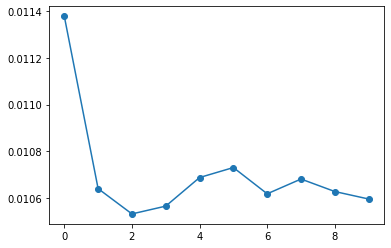

In [ ]:
plt.plot(history.history['loss'], 'o-')

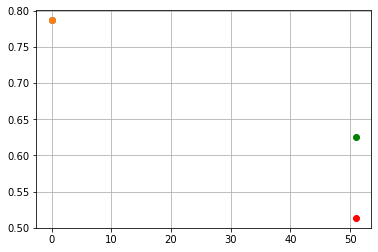

In [ ]:
y_pred = model_rec_deep.predict(X_test)
plot_series(X_train[0], y_test[0], color='g')
plot_series(X_train[0], y_pred[0], color='r')
plt.show()

#LSTM

In [ ]:
def last_time_step_mse(Y_true, Y_pred):
    return keras.metrics.mean_squared_error(y_test[:, -1], y_pred[:, -1])

In [ ]:
model = keras.models.Sequential([
    keras.layers.LSTM(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.LSTM(20, return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(10))
])

model.compile(loss="mse", optimizer="adam", metrics=[last_time_step_mse])
history = model.fit(X_train, y_train, epochs=10)

Epoch 1/10
46/46 [==============================] - 4s 3ms/step - loss: 0.1696 - last_time_step_mse: 0.0112
Epoch 2/10
46/46 [==============================] - 0s 3ms/step - loss: 0.0818 - last_time_step_mse: 0.0112
Epoch 3/10
46/46 [==============================] - 0s 3ms/step - loss: 0.0310 - last_time_step_mse: 0.0112
Epoch 4/10
46/46 [==============================] - 0s 3ms/step - loss: 0.0280 - last_time_step_mse: 0.0112
Epoch 5/10
46/46 [==============================] - 0s 4ms/step - loss: 0.0277 - last_time_step_mse: 0.0112
Epoch 6/10
46/46 [==============================] - 0s 4ms/step - loss: 0.0275 - last_time_step_mse: 0.0112
Epoch 7/10
46/46 [==============================] - 0s 4ms/step - loss: 0.0275 - last_time_step_mse: 0.0112
Epoch 8/10
46/46 [==============================] - 0s 3ms/step - loss: 0.0273 - last_time_step_mse: 0.0112
Epoch 9/10
46/46 [==============================] - 0s 3ms/step - loss: 0.0272 - last_time_step_mse: 0.0112
Epoch 10/10
46/46 [=========

In [ ]:
model.evaluate(X_test, y_test)

69/69 [==============================] - 1s 2ms/step - loss: 0.0248 - last_time_step_mse: 0.0112


[0.024831291288137436, 0.011166149750351906]

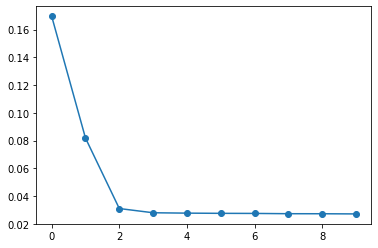

In [ ]:
plt.plot(history.history['loss'], 'o-')

In [ ]:
X_train[0:]

array([[0.78707224],
       [0.68060837],
       [0.7148289 ],
       ...,
       [0.47908745],
       [0.60836502],
       [0.62357414]])

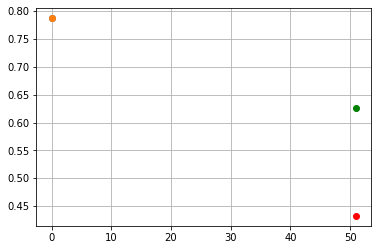

In [ ]:
y_pred = model.predict(X_test)
plot_series(X_train[0], y_test[0], color='g')
plot_series(X_train[0], y_pred[0][0][0], color='r')
plt.show()